In [10]:
# This file examines the accepted_2017_reduced.csv created in reduce_data.ipynb
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the reduced dataset
df = pd.read_csv("../data/accepted_2017_reduced.csv")   # adjust if needed
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,120113784,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,Supervisor,...,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,N,Cash,N
1,120037097,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,Teller,...,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,N,Cash,N
2,120122709,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,Legal Assistant,...,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,N,Cash,N
3,120087572,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,Senior Community Coordinator,...,20.0,0.0,0.0,59000.0,28669.0,36700.0,19500.0,N,Cash,N
4,120044125,4000.0,4000.0,4000.0,36 months,16.02,140.67,C,C5,NaN,...,50.0,0.0,0.0,5500.0,4184.0,5500.0,0.0,N,Cash,N


In [4]:
# check target distribution
df['loan_status'].value_counts()

loan_status
Fully Paid            130152
Charged Off            39148
Late (31-120 days)      8004
Late (16-30 days)       1492
Default                   21
Name: count, dtype: int64

In [5]:
# check target distribution percentages
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid            72.785026
Charged Off           21.892773
Late (31-120 days)     4.476084
Late (16-30 days)      0.834373
Default                0.011744
Name: proportion, dtype: float64

/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/986665300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


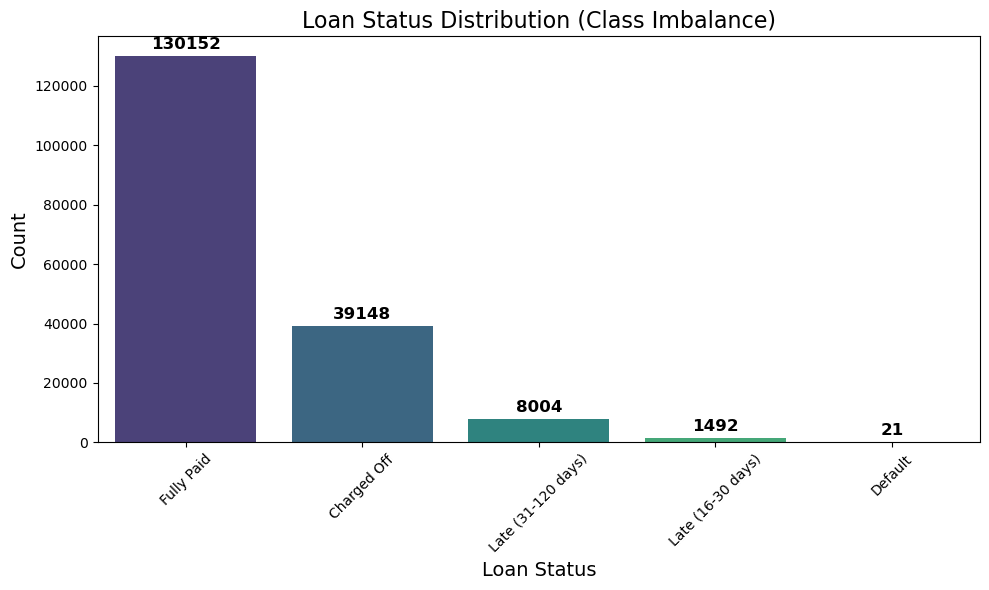

In [15]:
#  plot target distribution

# Count values in the order they appear (descending)
counts = df['loan_status'].value_counts()
order = counts.index

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='loan_status',
    order=order,
    palette="viridis"
)

# --- Add data labels ---
for i, count in enumerate(counts):
    ax.text(
        i,                              # x coordinate
        count + (0.01 * max(counts)),   # y coordinate slightly above bar
        str(count),                     # text (count)
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold'
    )

plt.title("Loan Status Distribution (Class Imbalance)", fontsize=16)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()